In [91]:
###### Visualizing gradient descent for a cost function with 2 variables

import numpy as np
import math
import cv2
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [92]:
### define a random function with two variables that has a known minimum

def f(w1,w2):
    
    return (w1**2 + w2**2 + w1*w2 - 5*(w1+w2))

In [93]:
## Calculate derivatives with respect to each variable manually
def gradient(function, w1, w2):
    return [2*w1 + w2 - 2*w2, 2*w2 + w1 - 2*w1]


In [94]:
#### Calculate the distance between previous and updated weight vectors

def distance(vec1, vec2):
    
  return math.sqrt((vec2[1]-vec1[1])**2 + (vec2[0] - vec1[0])**2)

In [95]:
w1 = 5.0
w2 = 4.0

In [96]:
epsilon = 0.01
lr = 0.1
vec = [[w1,w2]]

In [97]:
#### Define gradient descent 

def gd(f,w1, w2, lr , decay = False):
    
    error = 1
    while error > epsilon:
        
        w1 = w1 - lr*gradient(f, w1, w2)[0]
        w2 = w2 - lr*gradient(f, w1,w2)[1]
        
        new_vec = [w1,w2]
        vec.append(new_vec)
        
        error = distance(vec[-1], vec[-2])
        if decay:
                
            lr = lr*0.95
    return vec
        
        

In [98]:
weights = gd(f, w1, w2, lr, decay = True)

weights

[[5.0, 4.0],
 [4.4, 3.64],
 [3.9098, 3.319831],
 [3.5036958477500004, 3.036810054759438],
 [3.163268104327006, 2.7872837497143],
 [2.87499377951358, 2.5674017829936466],
 [2.628731358968242, 2.373486692814657],
 [2.4167326200858446, 2.202192583819177],
 [2.232981036873581, 2.0505553348786703],
 [2.072738018829717, 1.915988948989336],
 [1.9322247266674204, 1.796257117505199],
 [1.808394411776329, 1.6894352732854305],
 [1.698766524052193, 1.5938709409811636],
 [1.601303822620305, 1.5081461600994237],
 [1.514319983738379, 1.4310435992767434],
 [1.4364092061886802, 1.3615168507615456],
 [1.3663919302263454, 1.2986648272505281],
 [1.3032725269730097, 1.2417099219921288],
 [1.2462059946838626, 1.1899794950513998],
 [1.194471511127093, 1.1428902349511911],
 [1.1474512603032982, 1.0999349721398528],
 [1.1046133559172608, 1.0606715653045384],
 [1.0654979750588773, 1.024713530976278],
 [1.029706027778184, 0.9917221348692089],
 [0.9968898448057856, 0.9613997070804533],
 [0.9667454824211715, 0.933

In [99]:
weights = np.array(weights)
weights.shape

(46, 2)

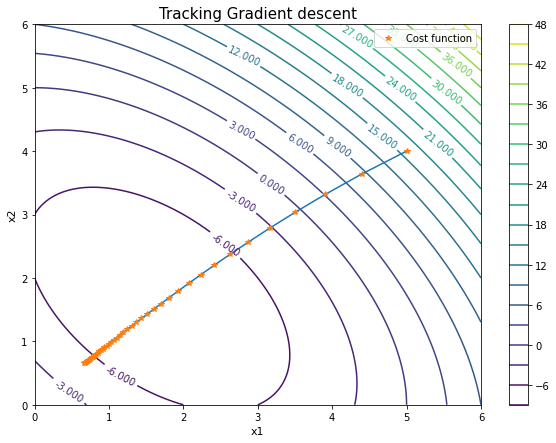

In [103]:
x1 = np.linspace(0, 6, 250)
x2 = np.linspace(0,6, 250)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
fig = plt.figure(figsize = (10,7))
contours = plt.contour(X1, X2, Z, 20)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Tracking Gradient descent", fontsize=15)
plt.plot(weights[:,0],weights[:,1])
plt.plot(weights[:,0],weights[:,1], '*', label = "Cost function")
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()

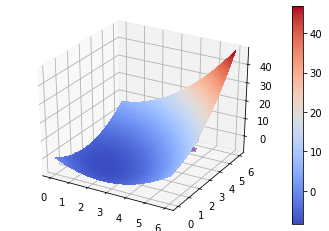

In [115]:
from matplotlib import cm
x1 = np.linspace(0, 6, 250)
x2 = np.linspace(0,6, 250)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.plot(weights[:,0],weights[:,1])
plt.plot(weights[:,0],weights[:,1], '*', label = "Cost function")
surf = ax.plot_surface(X1, X2, Z,cmap = cm.coolwarm
                       ,linewidth=0, antialiased=False)
#ax.zaxis.set_major_locator(LinearLocator(10))
plt.plot(weights[:,0],weights[:,1])
plt.plot(weights[:,0],weights[:,1], '*', label = "Cost function")
fig.colorbar(surf)
plt.show()